## Thoughts on Fourier Transformations

The fourier transformation takes a series of even samples in the time domain and converts them into the frequency domain.  For my purposes, I'm using it in relationship to audio, so this post will be written in that context.

When I was young, I learned that all colors were a combination of red, green, and blue.  There are some caveats to that idea, but let's call this "loosely true" for the sake of arguement.  Back then I was coding in QBasic, and I was able to programatically confirm that all colors are composed of some mix of RGB.

This brought me to wonder, what is the basis of sound?  Can all sounds be made from some combination of other sounds?  The answer is yes.  All sounds can be made from a combination of the sine wave.  If you've ever listened to a sine wave, I'm sure you'll agree it has a very simple, pure sound reminiscent of early electronic music using the first generation of synthesizers.  How could this artificial sounding tone ever compose the complexity of a human voice, the sound of glass shattering, or a rock and roll guitar solo with heavy distortion?

The answer comes in the combination of sine waves in varying amplitudes, duration, and frequency.  I'll leave the derivation of this to your own googling or perhaps a future post, but its relatively easy to convince one's self that any sound wave can be composed of a series (however large) of sine waves.

Sounds is created via compression waves.  When a drummer hits a snare drum, the top membrane (and often a few other parts) start vibrating rapidly.  As they do, the air around it is compressed into waves which radiate out from it until hitting our ears and being interpretted by our brains.

Inside a microphone is a flat surface known as a diaphram.  When sound waves travelling through the air hit it, they push it down.  The diaphram is made to be flexible, so that the amount it is displaced can be measured.

It is the combination of many sound waves that produce the complex sounds we hear.  Overlapping sound waves can amplify or cancel each other, pushing the microphone's diaphram in kind.    Recording devices cannot continously measure the sounds.  They have to take regular measurements, called samples, of the signal.  Each sample records the position of the diaphram in terms of where it's currently displace to.

The two sine waves displayed below have different periods.  Our ears are able to detect the differences in periodicity of these compression waves that hit the ear drum and our brain understands those differences as frequencies.

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

period1 = np.pi * .25
period2 = np.pi * .125

def plot_sine_wave(period, title, color):
    x = np.arange(0, np.pi * 10, .01)
    y = np.sin(x * period)
    plt.figure(figsize=(10,3))
    plt.plot(x, y, color=color)
    plt.title(title)
    plt.xlabel('samples', fontsize=13)
    plt.ylabel('amplitude', fontsize=13)
    plt.show()
    return y

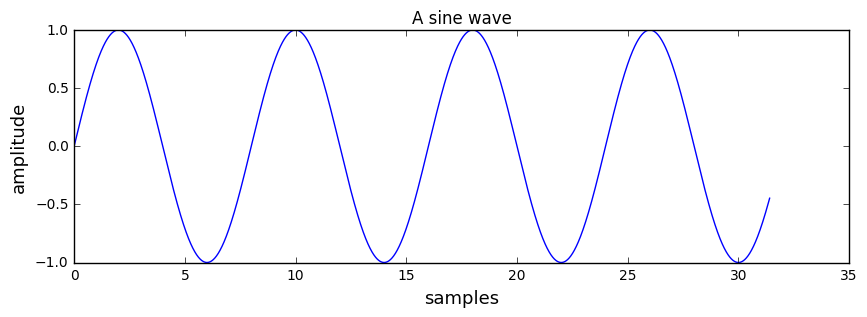

In [56]:
y1 = plot_sine_wave(period1, 'A sine wave', 'blue')

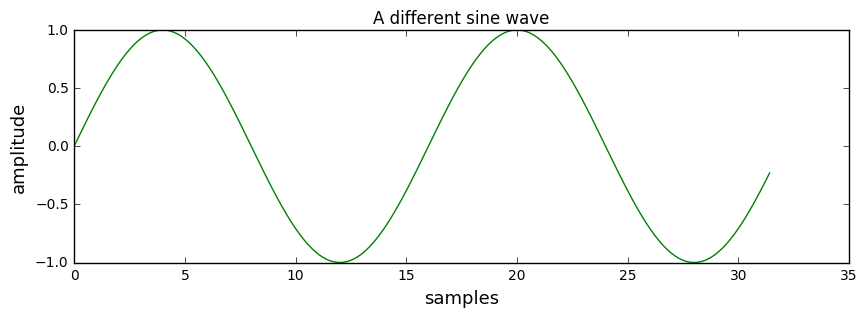

In [57]:
y2 = plot_sine_wave(period2, 'A different sine wave', 'green')

If a source is emitting sound of both these frequences simultaneously, and they're also in phase (if you don't know what that means, don't worry about it), then the compression waves produced in the air would be a direct combination, or the sum of both serieses.  Thus, when they're both high, they'll amplify each other.  When one peaks as the other troughs, they cancel each other.  The resulting sum and both sources are plotted in the figure below.

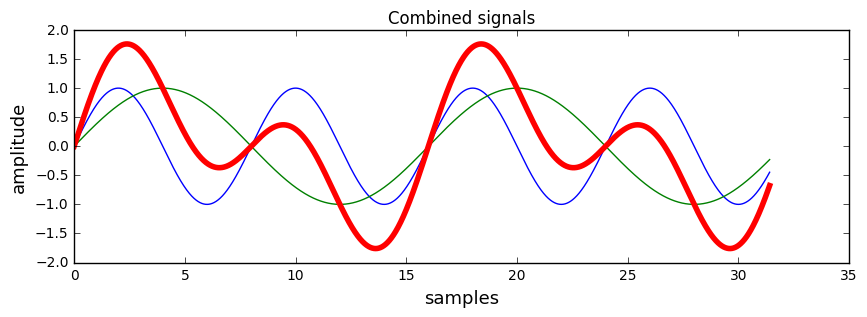

In [58]:
x = np.arange(0, np.pi * 10, .01)
y = y1 + y2
plt.figure(figsize=(10,3))
plt.plot(x, y1, color='blue')
plt.plot(x, y2, color='green')
plt.plot(x, y, linewidth=4, color="red")
plt.title('Combined signals')
plt.xlabel('samples', fontsize=13)
plt.ylabel('amplitude', fontsize=13)
plt.show()

Your ear only gets the sum of all signals (the red line above).  Assuming you knew it was a combination of only two frequencies, try to imagine guessing what two frequencies would combine to yield this shape... not necessarily intuitive!  Thanksfully we have the Fourier transformation we can use to do this.

If we were starting from this waveform, and we wanted to recover the frequencies, the Fourier transformation comes to the rescue.  Below is the formula for computing the fourier transformation.  I've typeset it to suit the discussion I want to have.

$X_k = \sum\limits_{n=0}^{N-1} \hspace{5pt} \big(x_n\big) \hspace{5pt} \cdot \hspace{5pt} \Bigg(e^{\dfrac{-i2\pi kn}{N}}\Bigg)$

In this formula, $k$ represents the frequency, $n$ represents time, and $N$ is the number of samples taken.

To me, the most intuitive way to understand this formula is to think about the two elements of the out product.  I've wrapped each in parenthesis.  We'll explore them in order, but let's first discuss a bit more about what the fourier transformation is doing.

Getting back to the formula above, the term $x_n$ is the $n$th sample taken.  Because it's measuring how displaced a microphone's diagram is at a given time, it is measuring the amplitude of the sound while not obviously recording any information about the frequency.  Remember that $x_n$ is 0 if the diaphram is not displaced at all (i.e. silence), and it is different from 0 when the sum of the combined overlapping frequencies are not cancelling each other out.

The second term, $e^{\frac{-i2\pi kn}{N}}$ can be intimidating to decompose.  Let's start with it's intuitive purpose.  This term gives you the amplitude you would expect if frequency $k$ were active in your samples.  We can call this the expectation of where signal $k$ should be if it's part of the mix.  Note that this is not the expectation in the statistical sense, though.

Essentially, the expectation says that *if* a signal of frequency $k$ is present, then the diaphram of the microphone should be displaced by this much at the given time $n$.  Why exactly that exponential should tell us where this value might not be obvious and requires a good understanding of radial coordinates and complex numbers.  Shoot me an email if you'd like to see another post on that topic.  It's actually an important result, but one that seems out of scope here.

As a variety of sound waves all overlap, they're going to cancel each other out from time to time.  The formula above doesn't directly account for this.  There will surely be times in a complex audio file when the peaks and troughs of overlapping sound waves will cancel each other out.  Yet, if a frequency is present in a set of samples, there must be some occasions when it is not interacting a lot with other frequencies, and thus will align with pushing the diaphram's amplitude high at the expected time, which is given by this term.

While both terms in this summation are rational numbers, it might help to momentarily think of them as binary.  When either or both are low ( $\approx 0$ ), you wind up with zero.  If and only if both are high do you get a significant product.  It's a bit like an AND logical gate in this way.  When both are consistently high together, we might thing of that as good evidence for the presence of that particular frequency.  The more observations of high values as we iterate through the $n$ samples, the higher the resulting $X_k$ we calculate.

When you do these sums over all possible frequencies $k$, you end up with an array whose values indicate the magnitude of that frequency in the measurement.

You'll find that in most cases, the result is a little "fuzzy".  Not only can harmonic frequencies appear, but noise around particular tones can get introduced.  If you're trying to precisely encode and decode some signal, you'll need to have some other step after the $X_k$ vector is calculated.

Although I didn't want it to be the subject of this article, it would be a major oversight not to acknowledge that the faster fourier transformation (FFT) is a dynamic programming algorithm which allows this discrete fourier transformation (DFT) to be completed in an efficient amount of time.  If you did it the way I described it, you'd be working a $O(n^2)$ time complexity problem, since you have to loop over all frequencies $k$ and for each over all samples $n$.  The FFT allows this operation to be done in $O(n \cdot \text{log} (n))$ time.

You can read about that and many other aspects of FFT elsewhere.  What I often find underrepresented in the excellent tutorials already available online is a discussion that frames the product used in the fourier transformation in the way I've done so above.  This was the explanation that helped me truely understand DFT beyond the rote algebraic understanding.
